# Q20
Tips Prediction : One waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips. 
The data is provided in file: MLR_Q20_TipsDataset.csv.
Link: https://drive.google.com/drive/folders/1ILKastUTJWccxaxIpJpjqCJDpsMJ-oC8

    1) Can you predict the tip amount, using the other variables? 
    2) Which variables come out to be important? What does this mean for the restaurant?
    3) Are there signs of violation of any assumptions of linear regression?

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("MLR_Q20_TipsDataset.csv")

df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [3]:
num_vars = ['tip', 'total_bill', 'size']
df[num_vars].corr().apply(lambda x: pd.Series.round(x, 3))

,tip,total_bill,size
tip,1.000,0.676,0.489
total_bill,0.676,1.000,0.598
size,0.489,0.598,1.000


In [4]:
cat_vars = ['sex', 'smoker', 'day', 'time']
df_dummy = pd.get_dummies(df, prefix=cat_vars, 
                           columns=cat_vars, 
                           drop_first=True)
df_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat',
       'day_Sun', 'day_Thur', 'time_Lunch'],
      dtype='object')

In [5]:
# check the vif values, before forward feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_var = ['total_bill', 'size']
X = df_dummy[x_var]
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], index=X.columns)

total_bill    8.684373
size          8.684373
dtype: float64

In [6]:
def fit_lin_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constan
    reg_model = sm.OLS(Y,X).fit()
    return reg_model

In [7]:
df_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat',
       'day_Sun', 'day_Thur', 'time_Lunch'],
      dtype='object')

In [8]:
# remove insignificant variables day_Sun, time_Lunch, sex_Male, day_Thur, smoker_Yes, day_Sat
x_var = ['total_bill', 'size']
y_var = 'tip'
reg_model  = fit_lin_reg_with_intercept(df_dummy[x_var], df_dummy[y_var])
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 27 May 2022   Prob (F-statistic):           9.67e-34
Time:                        22:17:54   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

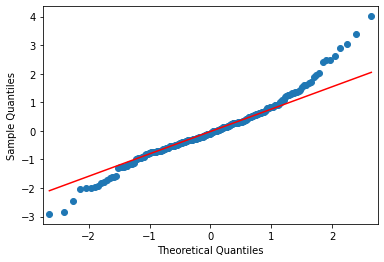

In [9]:
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

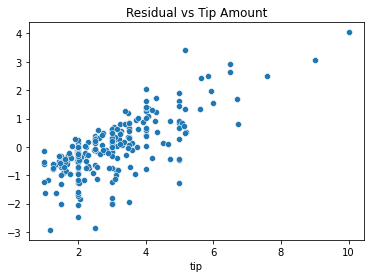

In [10]:
# Residual plot 
#residuals = reg_model.resid 
fig = sns.scatterplot(x=df_dummy[y_var], y=residuals)
fig.set_title("Residual vs Tip Amount")
plt.show()

# Answers
    1) Can you predict the tip amount, using the other variables? 
        0.6689 + 0.0927 * total_bill  + 0.1926 * size
    2) Which variables come out to be important? What does this mean for the restaurant?
    Its total_bill and size. It might that when people spend more, then they prefer to tip more. 
    3) Are there signs of violation of any assumptions of linear regression?
    From the qq plot and residula plot, we see that the residuals are not distributed normally. In fact, there is clear trend, where we see that the residual increases with increase in value of tip.